# Data Cleaning and Exploratory Data Analysis with Pandas on Trending Youtube Video Statistics

In [4]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [5]:
ALL_videos = [i for i in glob.glob('*.{}'.format('csv'))]
ALL_videos

['INvideos.csv',
 'GBvideos.csv',
 'USvideos.csv',
 'RUvideos.csv',
 'MXvideos.csv',
 'JPvideos.csv',
 'FRvideos.csv',
 'DEvideos.csv',
 'CAvideos.csv',
 'KRvideos.csv']

In [6]:
all_df = [] # list to store each data frame separately

In [7]:
for csv in ALL_videos:
    df=pd.read_csv(csv)
    df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
    all_df.append(df)

In [8]:
all_df[8].head() # index 0 to 9 as shown in all_videos dataframe above
# for example Canada has 8 index

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


To make all of the columns easier to handle and more comprehensible, the first step in the data cleaning procedure was to update their data types. It should be noted that the data type for a number of columns was changed to strings; as strings are a form of object in pandas, when the data types are shown, they appear as objects.

In [9]:
for df in all_df:

 # video_id 
    df['category_id'] = df['category_id'].astype(int)

 # trending date
    df['trending_date'] = df['trending_date'].astype('str')
    date_pieces = (df['trending_date']
                   .str.split('.')
                  )

    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)


In [10]:
   for df in all_df:
   
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype('str') 
    
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    #description
    df['description'] = df['description'].astype('str')
    


In [11]:
all_df[8].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Year,Day,Month
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,17,14,11
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,17,14,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,17,14,11
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,17,14,11
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,17,14,11


In [12]:
   for df in all_df:
   # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [13]:
all_df[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Year,Day,Month
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,17,14,11
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,17,14,11
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,17,14,11
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,17,14,11
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,17,14,11


Separate publish_date and publish_time

In [15]:
for df in all_df:
    df.insert(4, 'publish_date', df['publish_time'].dt.date) # loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time





# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_df:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [16]:
all_df[0].dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
Year                               int64
Day                                int64
Month                              int64
dtype: object

In [17]:
all_df[0].head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Year,Day,Month
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,2017-11-12,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,17,14,11
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,2017-11-13,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,17,14,11
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,2017-11-12,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,17,14,11
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,2017-11-12,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,17,14,11
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,2017-11-13,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,17,14,11


In [18]:
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_df:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [19]:
all_df[0].dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
Year                               int64
Day                                int64
Month                              int64
dtype: object

In [20]:
for df in all_df:
    df.set_index('video_id', inplace=True)

### Examining Missing Values

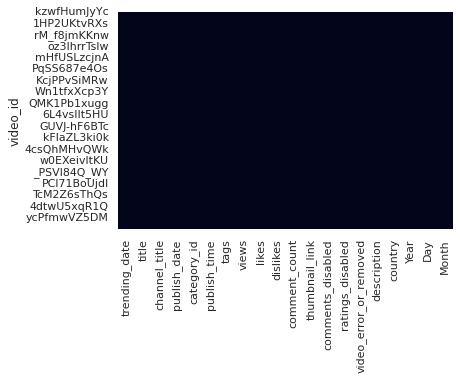

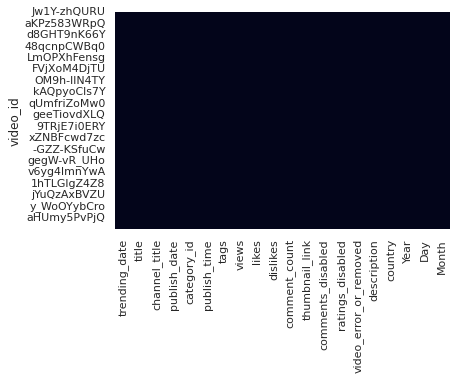

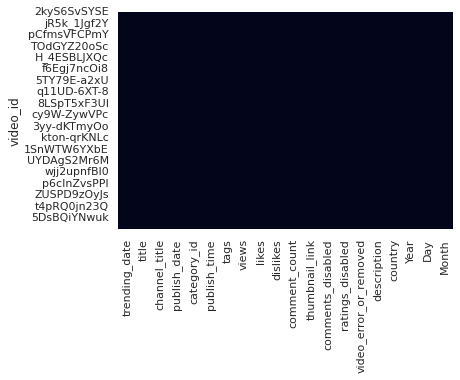

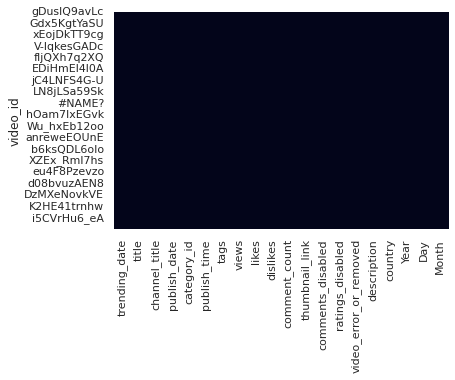

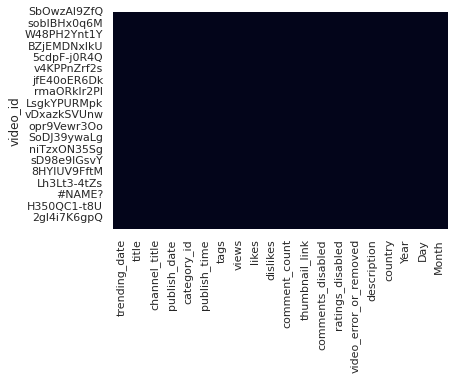

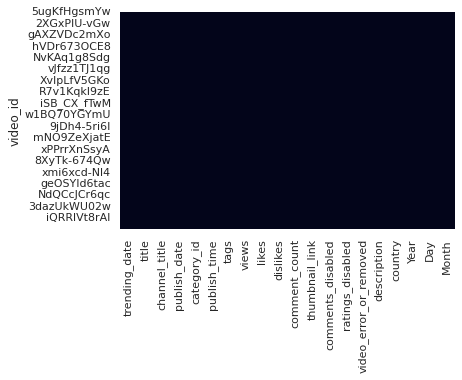

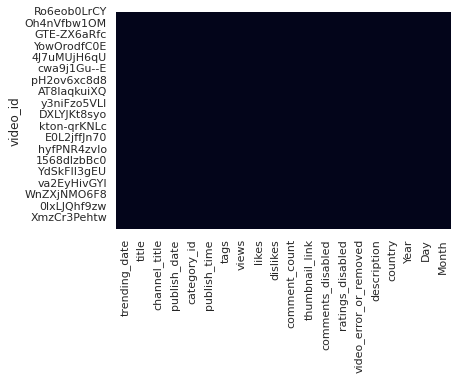

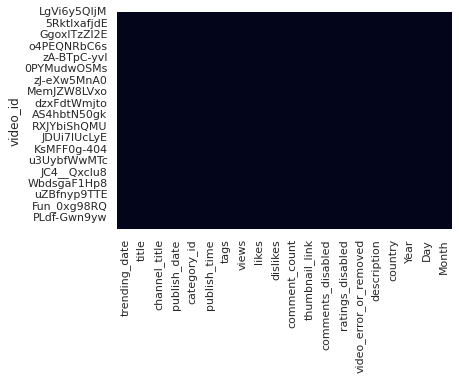

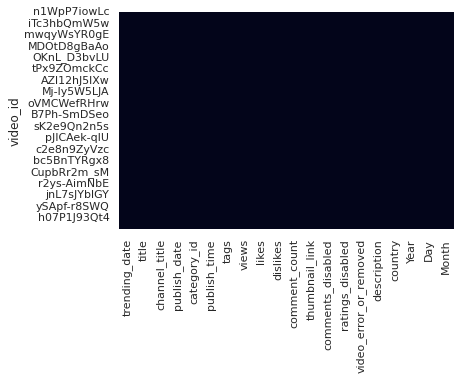

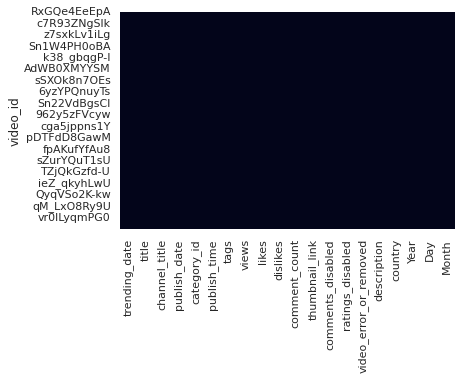

<Figure size 432x288 with 0 Axes>

In [21]:
for df in all_df:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

No null values in all datasets

### Combining Every df Into One df

In [22]:
combined_df = pd.concat(all_df)

In [23]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

In [25]:
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

In [26]:
# Printing results
combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
K7M9zPc5Ack,2018-05-30,19:53:27,18.31.05,CA
xTlNMmZKwpA,2018-05-29,14:05:10,18.31.05,DE
J0zHWZ7yqxs,2018-05-30,18:17:15,18.31.05,DE
71w4NtvTWI8,2018-05-31,15:52:42,18.31.05,DE
ILSONpMd2L0,2018-05-29,17:00:01,18.31.05,DE


In [27]:
# read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [28]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']



In [29]:
combined_df.insert(2, 'Category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'Category', backup_df['category_id'].map(category_id))

In [30]:
for df in all_df:
    df.insert(2, 'Category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)


,trending_date,title,Category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,,,,
K7M9zPc5Ack,18.31.05,الكاميرا الخفية ردو بالكم .. الحلقة 14 زوج غيو...,People & Blogs,Dzair Now,2018-05-30,22,19:53:27,"DzairNow|""dzair""|""new""|""now""|""رمضان""|""2018""|""r...",658075,4925,1057,3122,https://i.ytimg.com/vi/K7M9zPc5Ack/default.jpg,False,False,False,nan,CA,18,31,5
xTlNMmZKwpA,18.31.05,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Music,Cardi B,2018-05-29,10,14:05:10,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",20723565,1018786,48090,68790,https://i.ytimg.com/vi/xTlNMmZKwpA/default.jpg,False,False,False,"Cardi B, Bad Bunny & J Balvin - I Like It from...",DE,18,31,5
J0zHWZ7yqxs,18.31.05,IDIOTENTEST!!,Entertainment,MrGamerPros,2018-05-30,24,18:17:15,"mrgamerpros|""mgp""|""impact""|""iMPacT""|""Team iMPa...",139374,10610,441,603,https://i.ytimg.com/vi/J0zHWZ7yqxs/default.jpg,False,False,False,IMPACT VIDEO: https://goo.gl/ejD2na• MEIN SHOP...,DE,18,31,5


<AxesSubplot:xlabel='ratio', ylabel='Category'>

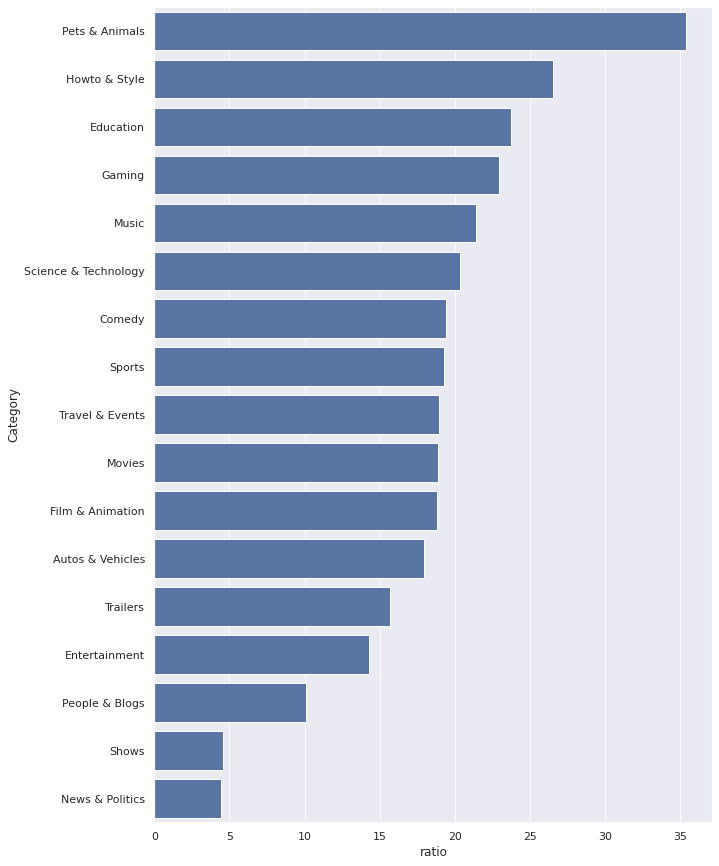

In [31]:
# calculating total likes for each category
likesdf = combined_df.groupby('Category')['likes'].agg('sum')



# calculating total dislikes for each category
dislikesdf = combined_df.groupby('Category')['dislikes'].agg('sum')



# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 



# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()




# plotting bar chart
ratiodf.columns = ['Category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="Category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

### Users like videos from which category more?

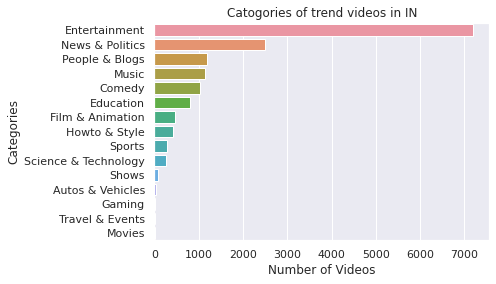

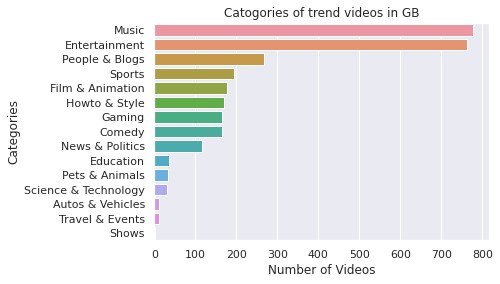

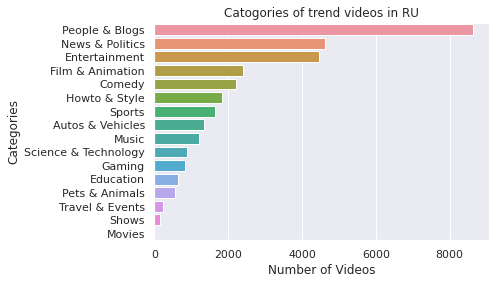

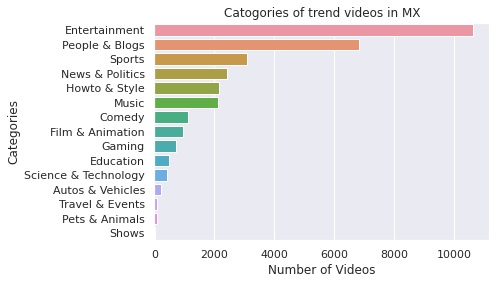

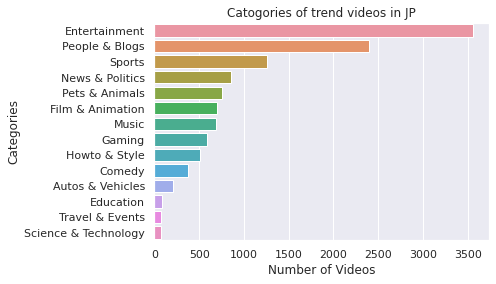

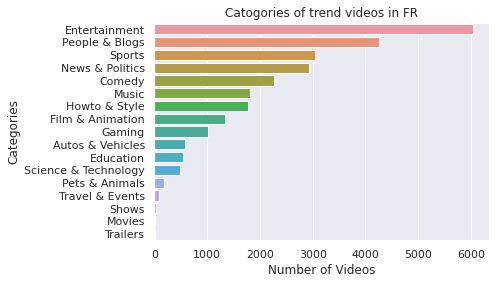

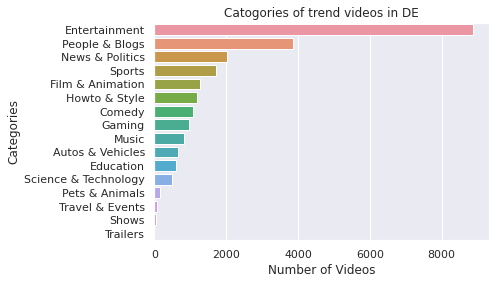

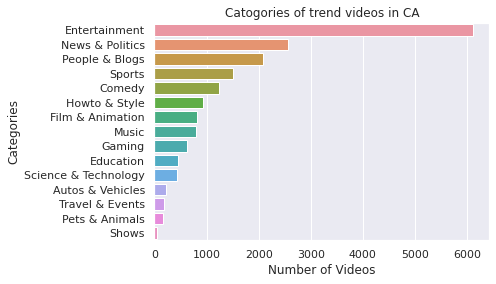

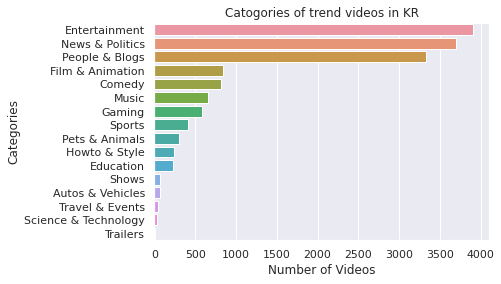

<Figure size 432x288 with 0 Axes>

In [34]:
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['Category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['Category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['Category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['Category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

### Top 5 videos that are on trending in each country?


In [38]:
temporary = []
for df in all_df:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)
# Printing 3 randomly selected countries
temporary[2][['title', 'country' ,'channel_title', 'Category', 'views', 'likes']]

,title,country,channel_title,Category,views,likes
video_id,,,,,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,US,ChildishGambinoVEVO,Music,225211923,5023450
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,US,YouTube Spotlight,Entertainment,149376127,3093544
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,US,ArianaGrandeVevo,Music,148689896,3094021
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",US,BeckyGVEVO,Music,139334502,1425496
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,US,ibighit,Music,123010920,5613827


### Is the most liked video also the most trending video?

In [41]:
temporary = [] # to store results for each country
for df in all_df:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)
# Printing 3 randomly selected results
temporary[0][['country','views', 'likes']]

,country,views,likes
video_id,,,
FlsCjmMhFmw,IN,125432237,2912710
6ZfuNTqbHE8,IN,89930713,2606663
dfnCAmr569k,IN,42019590,1804377
2Vv-BfVoq4g,IN,39082222,1721384
tCXGJQYZ9JA,IN,43738208,1658756


### Users like videos from which category more?

In [46]:
temp = combined_df
temp = temp.groupby('Category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/tmp/ipykernel_67/913447388.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('Category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
Category,,
Entertainment,17056619045,464513785
Music,13989726712,408820939
Comedy,4489204660,216470322
People & Blogs,5507410219,156012602
Howto & Style,2163363438,76015200


### Users comment on which category the most?

In [48]:
temp = combined_df
temp = temp.groupby('Category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

/tmp/ipykernel_67/4127356080.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('Category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())


,views,likes,comment_count
Category,,,
Entertainment,17056619045,464513785,67635871
Music,13989726712,408820939,34442755
People & Blogs,5507410219,156012602,24434535
Comedy,4489204660,216470322,23115955
News & Politics,3423800398,53069752,14840444


In [51]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.758411,0.395747,0.456455
likes,0.758411,1.000000,0.420160,0.704673
dislikes,0.395747,0.420160,1.000000,0.661584
comment_count,0.456455,0.704673,0.661584,1.000000


<AxesSubplot:>

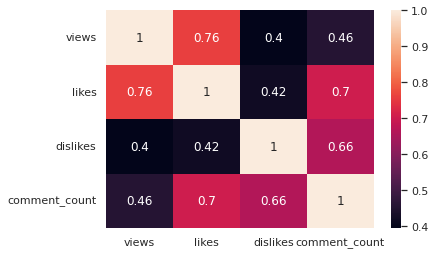

In [52]:
sns.heatmap(corr, annot=True)

The data show a correlation between views and likes, likes and comment count, and dislikes and comment count that is positive. We reached to this conclusion because a positive relationship exists whenever the correlation coefficient, abbreviated corr, is larger than zero.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8acee4d-90ab-4fc4-af3d-be8f383681d8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>